<a href="https://colab.research.google.com/github/tarupathak30/machine_learning_algorithms/blob/main/gradient_descent_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [ ]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=42)

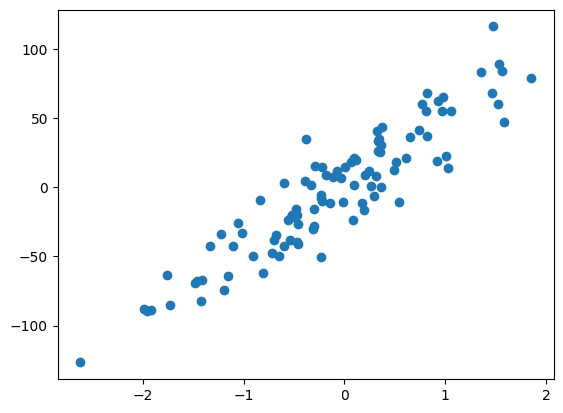

In [ ]:
plt.scatter(X, y)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr.fit(x_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[46.747264]
0.19844442845175525


In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8019015156159199

In [ ]:
class GDRegressor:

  def __init__(self, learning_rate, epochs):
    self.m = 100
    self.b = -120
    self.lr = learning_rate
    self.epochs = epochs

  def fit(self, X, y):
    # calculate the b using GD
    for i in range(self.epochs):
      loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
      loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b) * X.ravel())
      self.m = self.m - (self.lr * loss_slope_m)
      self.b = self.b - (self.lr * loss_slope_b)

    print(self.b)
    print(self.m)

  def predict(self, X):
    return self.m * X + self.b


In [ ]:
gd = GDRegressor(0.001, 50)

In [ ]:
gd.fit(x_train, y_train)

0.1812123673489524
46.738522070227745


In [ ]:
y_pred1 = gd.predict(x_test)

In [ ]:
r2_score(y_pred1, y_test)

0.7610211401196302

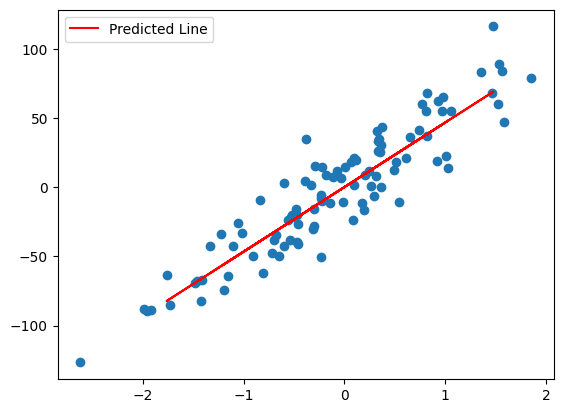

In [ ]:
plt.scatter(X, y)
plt.plot(x_test, y_pred1, color='red', label='Predicted Line')
plt.legend()
plt.show()